# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

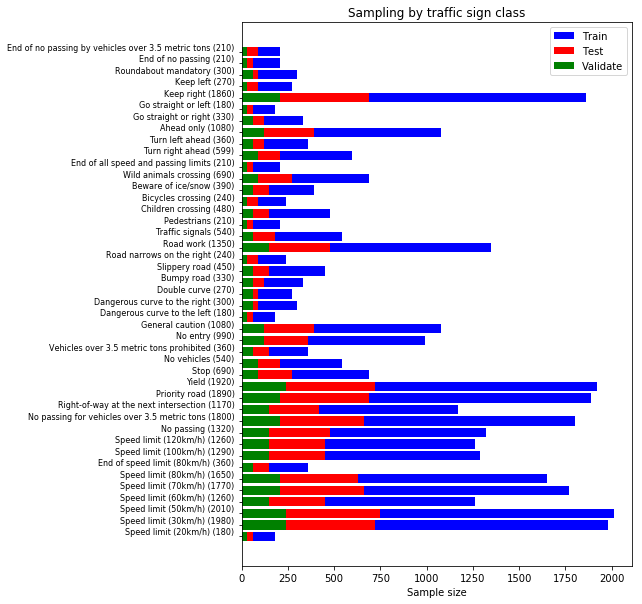

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

sign_names = pd.read_csv('data/signnames.csv')

def plot_input_data_stat(y_valid_data, y_test_data, y_train_data):
    train_count = np.bincount(y_train_data)
    test_count = np.bincount(y_test_data)
    valid_count = np.bincount(y_valid_data)
    fig, ax = plt.subplots(figsize=(7,10))
    xs = range(1,len(train_count) + 1)
    ax.barh(xs,train_count, height=0.8, color='b', label='Train')
    ax.barh(xs,test_count, height=0.8, color='r', label='Test')
    ax.barh(xs,valid_count, height=0.8, color='g', label='Validate')    
    ax.set_yticks(xs)
    labels = [label + ' (' + str(num) + ')' for (label, num) in zip(sign_names['SignName'], train_count)]
    ax.set_yticklabels(labels)
    for tick in ax.yaxis.get_major_ticks():
        label = tick.label
        label.set_fontsize(8)
        label.set_verticalalignment("bottom")
    ax.set_ylabel('')
    ax.set_xlabel('Sample size')    
    ax.legend()
    ax.set_title('Sampling by traffic sign class')
    fig.savefig('output/visual.png') 
    plt.show()    


plot_input_data_stat(y_valid, y_test, y_train)


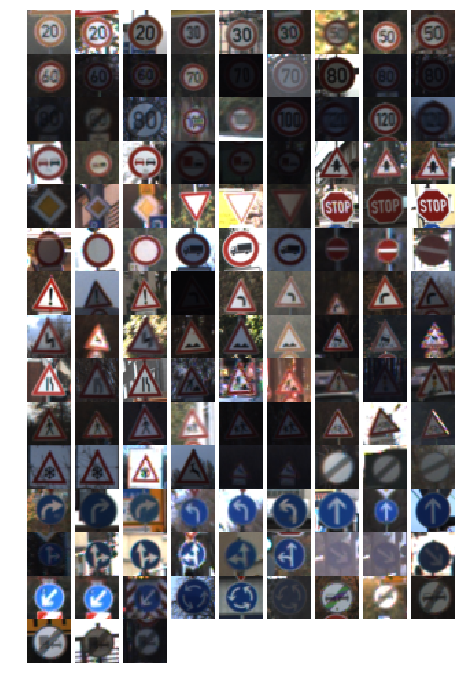

In [4]:
def sample_sign(sign_idx, sample_num = 3):
    idx = np.argwhere(y_train==sign_idx).T[0]
    images = X_train[idx]   
    return [images[image_idx] for image_idx in random.sample(range(0,len(images)), sample_num)]        

def sample_signs():
    signs_nested = [sample_sign(sign_idx) for sign_idx in range(0, 43)]
    return [item for sublist in signs_nested for item in sublist]
    
signs = sample_signs()
fig, ax = plt.subplots(43*3//9 + 1, 9, figsize=(6,12))
fig.subplots_adjust(left=0.0, right=1, wspace=0.001, hspace=0.001)
i = 0
i_max = len(signs)
for row in ax:
    for col in row:
        col.axis('off')
        if i < i_max:
            im = signs[i]
            col.imshow(im, cmap="gray")
        i += 1
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
from sklearn.utils import shuffle
import cv2
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc. 
###   return (float_image - 128.)/128.
### Feel free to use as many code cells as needed.
clahe = cv2.createCLAHE(tileGridSize = (4,4))
def normalize_image(image):
    """
    Normalizing to [-1,1] range
    """
    float_image = np.float32(image)
    result = (float_image - 128.)/128.
    return result[:,:, np.newaxis]
    
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def preprocess(data):
    return [normalize_image(clahe.apply(convert_to_grayscale(image))) for image in data]

def generate_data(X, y):
    """
    We augment existing data set with additional data by exploiting symmetries of traffic signs and also 
    by deforming/occluding the traffic signs. Example is given here https://navoshta.com/traffic-signs-classification/
    """
    # rotation invariant
    rot90_inv = [12, 15, 40]
    rot180_inv = [17, 32]
    # reflection invariant
    reflect_hor_inv = [1, 5, 7]
    reflect_ver_inv = [35, 30, 29, 26, 22, 18, 13, 11]
    # some reflections were not done, like for 17 and 12, as they are overrepresented anyway
    # reflection converts to another class    
    reflect_ver_conv = [(37,36),(36,37),(33,34),(34,33),(19,20),(20,19), (39,38), (38,39)]

    X_result, y_result = [], []
    for i in range(0,43):
        idxs = np.argwhere(y==i).T[0]
        for x in X[idxs]:
            X_result.append(x)
            y_result.append(i)
            if i in rot90_inv:
                X_result.append(np.rot90(x))
                y_result.append(i)
                X_result.append(np.rot90(x, k = 2))
                y_result.append(i)
                X_result.append(np.rot90(x, k = 3))
                y_result.append(i)
            if i in rot180_inv:
                X_result.append(np.rot90(x, k = 2))
                y_result.append(i)
            if i in reflect_hor_inv:
                X_result.append(np.flipud(x))
                y_result.append(i)
            if i in reflect_ver_inv:
                X_result.append(np.fliplr(x))
                y_result.append(i)        
            if i in reflect_ver_conv:
                X_result.append(np.fliplr(x))
                y_result.append(reflect_ver_conv[1])                           
    print("Samples given=", len(y), "pcs, after augmentation=", len(y_result))            
    return X_result, y_result



Samples given= 34799 pcs, after augmentation= 55859


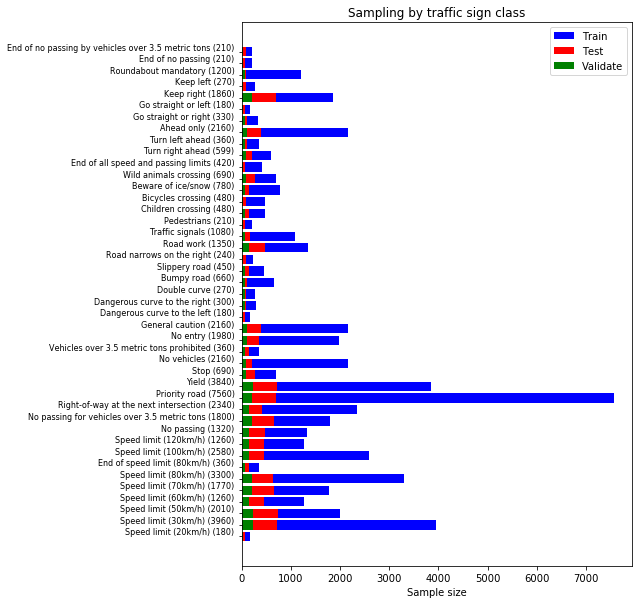

In [6]:
X_augmented_train, y_augmented_train = generate_data(X_train, y_train)
X_processed_train, y_processed_train = preprocess(X_augmented_train), y_augmented_train
X_processed_test = preprocess(X_test)
X_processed_valid = preprocess(X_valid)    
plot_input_data_stat(y_valid, y_test, y_processed_train)

Example image in RGB

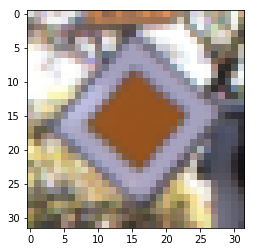

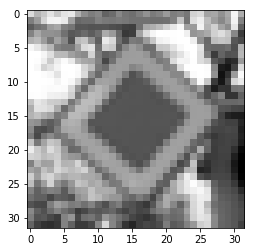

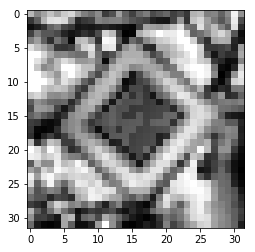

In [7]:
sign = sample_sign(12, sample_num=1)[0]
plt.figure()
plt.imshow(sign)
plt.show()
gray_image = convert_to_grayscale(sign)
plt.imshow(gray_image, cmap='gray')
plt.show()
clahe_image = clahe.apply(gray_image)
plt.imshow(clahe.apply(gray_image), cmap='gray')
plt.show()

Samples given= 1 pcs, after augmentation= 4


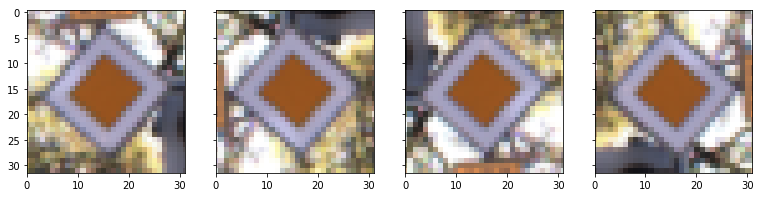

In [8]:
augmented_data, augmented_label = generate_data(np.array([sign]), np.array([12]))
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(13,3))
ax1.imshow(augmented_data[0])
ax2.imshow(augmented_data[1])
ax3.imshow(augmented_data[2])
ax4.imshow(augmented_data[3])
plt.show()

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def LeNet11(x, weights, biases, dropout_1, dropout_2):    
    mu = 0
    sigma = 0.1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    max_1 = maxpool2d(conv1, k=2)
    conv2 = conv2d(max_1, weights['wc2'], biases['bc2'])    
    max_2 = maxpool2d(conv2)
    conv3 = conv2d(max_2, weights['wc3'], biases['bc3'])    
    max_3 = maxpool2d(conv3)
    fc0   = tf.concat(1, [flatten(maxpool2d(max_1,k = 4)), flatten(maxpool2d(max_2, k = 2)), flatten(max_3)])
    fc1   = tf.add(tf.matmul(fc0, weights['wd1']), biases['bd1'])
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, dropout_1)
    fc2   = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2   = tf.nn.relu(fc2)
    fc2   = tf.nn.dropout(fc2, dropout_2)
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return logits



In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob_1 = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
start_learning_rate = 0.0002#0.001

EPOCHS = 200
BATCH_SIZE = 256
dropout_1 = 0.7
dropout_2 = 0.5
l2_penalty = 0.0001
l1_penalty = 0.00008
mu = 0
sigma = 0.1
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 32], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=[5, 5, 32, 108], mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal(shape=[5, 5, 108, 108], mean = mu, stddev = sigma)),    
    'wd1': tf.Variable(tf.truncated_normal(shape=[3968, 1024], mean = mu, stddev = sigma)),#3584
    'wd2': tf.Variable(tf.truncated_normal(shape=[1024, 400], mean = mu, stddev = sigma)),    
    'out': tf.Variable(tf.truncated_normal(shape=[400, n_classes], mean = mu, stddev = sigma))
}

biases = {
    'bc1': tf.zeros(32),
    'bc2': tf.zeros(108),
    'bc3': tf.zeros(108),    
    'bd1': tf.zeros(1024),
    'bd2': tf.zeros(400),
    'out': tf.zeros(n_classes),
}

logits = LeNet11(x, weights, biases, keep_prob_1, keep_prob_2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) \
    + l2_penalty * tf.nn.l2_loss(weights['wd1']) \
    + l2_penalty * tf.nn.l2_loss(weights['wd2']) \
    + l1_penalty * tf.reduce_sum(tf.abs(weights['wd1'])) \
    + l1_penalty * tf.reduce_sum(tf.abs(weights['wd2']))    
global_step = tf.Variable(0, trainable=False)
learning_rate = start_learning_rate
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation, global_step = global_step)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data, find_top_k = False, k = 3):
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], 
                                  feed_dict={x: batch_x, 
                                             y: batch_y, 
                                             keep_prob_1: 1.0,
                                             keep_prob_2: 1.0})
        total_accuracy += accuracy * len(batch_x)
        total_loss += loss * len(batch_x)
    if find_top_k:
        top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k), 
                         feed_dict={ x: X_data, 
                                     y: y_data, 
                                     keep_prob_1: 1.0,
                                     keep_prob_2: 1.0})
    else:
        top_k = None
    return total_loss / num_examples, total_accuracy / num_examples, top_k


train_loss_history = []
train_accuracy_history = []
validation_loss_history = []
validation_accuracy_history = []
validation_best_loss = -1
validation_best_loss_epoch = -1
best_epoch = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_processed_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_shuffled_train, y_shuffled_train = shuffle(X_processed_train, y_processed_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_shuffled_train[offset:end], y_shuffled_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, 
                                                    keep_prob_1: dropout_1,
                                                    keep_prob_2: dropout_2})
            
        validation_loss, validation_accuracy, top_k = evaluate(X_processed_valid, y_valid)
        validation_loss_history.append(validation_loss)
        validation_accuracy_history.append(validation_accuracy)        
        training_loss, training_accuracy, top_k = evaluate(X_processed_train, y_processed_train)    
        train_loss_history.append(training_loss)
        train_accuracy_history.append(training_accuracy)        
        print("EPOCH {} ...".format(i + 1))
        print("Training accuracy = {:.3f}".format(training_accuracy))        
        print("Validation accuracy = {:.3f}".format(validation_accuracy))        
        print("Training loss = {:.3f}".format(training_loss))
        print("Validation loss = {:.3f}".format(validation_loss))

        if validation_loss < validation_best_loss or validation_best_loss == -1:
            validation_best_loss = validation_loss
            validation_best_loss_epoch = i
            saver.save(sess, './traffic_sign_epoch')
        elif validation_best_loss_epoch + 100 < i or i + 1 == EPOCHS:
            saver.restore(sess, './traffic_sign_epoch')
            best_epoch = validation_best_loss_epoch
            print('Restored session of best epoch ', validation_best_loss_epoch, ' with validation loss ', validation_best_loss)
            break
        best_epoch = i
        print()        
        
    saver.save(sess, './traffic_sign')
    print("Model saved, for epoch: ", best_epoch)

Training...

EPOCH 1 ...
Training accuracy = 0.526
Validation accuracy = 0.344
Training loss = 26.945
Validation loss = 27.538

EPOCH 2 ...
Training accuracy = 0.720
Validation accuracy = 0.574
Training loss = 23.839
Validation loss = 24.380

EPOCH 3 ...
Training accuracy = 0.832
Validation accuracy = 0.695
Training loss = 21.517
Validation loss = 21.962

EPOCH 4 ...
Training accuracy = 0.894
Validation accuracy = 0.773
Training loss = 19.669
Validation loss = 20.069

EPOCH 5 ...
Training accuracy = 0.937
Validation accuracy = 0.834
Training loss = 18.120
Validation loss = 18.449

EPOCH 6 ...
Training accuracy = 0.954
Validation accuracy = 0.858
Training loss = 16.747
Validation loss = 17.064

EPOCH 7 ...
Training accuracy = 0.972
Validation accuracy = 0.879
Training loss = 15.462
Validation loss = 15.753

EPOCH 8 ...
Training accuracy = 0.981
Validation accuracy = 0.902
Training loss = 14.268
Validation loss = 14.519

EPOCH 9 ...
Training accuracy = 0.986
Validation accuracy = 0.911
T

EPOCH 73 ...
Training accuracy = 1.000
Validation accuracy = 0.974
Training loss = 0.088
Validation loss = 0.208

EPOCH 74 ...
Training accuracy = 0.999
Validation accuracy = 0.966
Training loss = 0.085
Validation loss = 0.201

EPOCH 75 ...
Training accuracy = 1.000
Validation accuracy = 0.977
Training loss = 0.082
Validation loss = 0.167

EPOCH 76 ...
Training accuracy = 1.000
Validation accuracy = 0.971
Training loss = 0.077
Validation loss = 0.187

EPOCH 77 ...
Training accuracy = 1.000
Validation accuracy = 0.975
Training loss = 0.078
Validation loss = 0.195

EPOCH 78 ...
Training accuracy = 1.000
Validation accuracy = 0.963
Training loss = 0.076
Validation loss = 0.193

EPOCH 79 ...
Training accuracy = 1.000
Validation accuracy = 0.972
Training loss = 0.081
Validation loss = 0.183

EPOCH 80 ...
Training accuracy = 1.000
Validation accuracy = 0.975
Training loss = 0.070
Validation loss = 0.171

EPOCH 81 ...
Training accuracy = 1.000
Validation accuracy = 0.971
Training loss = 0.087

EPOCH 145 ...
Training accuracy = 1.000
Validation accuracy = 0.979
Training loss = 0.055
Validation loss = 0.147

EPOCH 146 ...
Training accuracy = 1.000
Validation accuracy = 0.979
Training loss = 0.043
Validation loss = 0.170

EPOCH 147 ...
Training accuracy = 1.000
Validation accuracy = 0.972
Training loss = 0.048
Validation loss = 0.162

EPOCH 148 ...
Training accuracy = 1.000
Validation accuracy = 0.980
Training loss = 0.045
Validation loss = 0.185

EPOCH 149 ...
Training accuracy = 1.000
Validation accuracy = 0.978
Training loss = 0.044
Validation loss = 0.173

EPOCH 150 ...
Training accuracy = 1.000
Validation accuracy = 0.980
Training loss = 0.042
Validation loss = 0.154

EPOCH 151 ...
Training accuracy = 1.000
Validation accuracy = 0.980
Training loss = 0.036
Validation loss = 0.140

EPOCH 152 ...
Training accuracy = 1.000
Validation accuracy = 0.978
Training loss = 0.032
Validation loss = 0.162

EPOCH 153 ...
Training accuracy = 1.000
Validation accuracy = 0.976
Training los

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/scale.py:103: RuntimeWarning: invalid value encountered in log
  return np.divide(np.log(a, out=a), np.log(self.base), out=a)


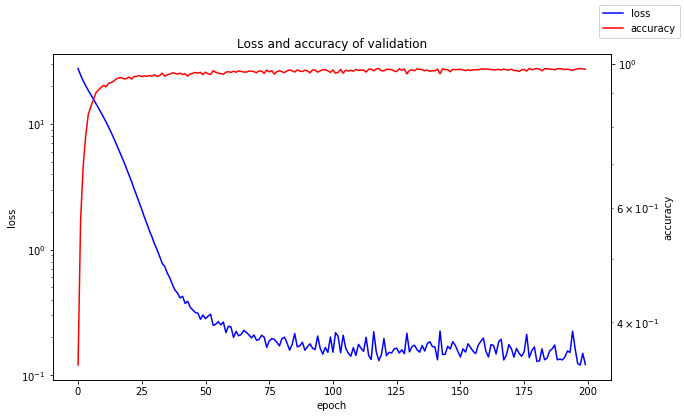

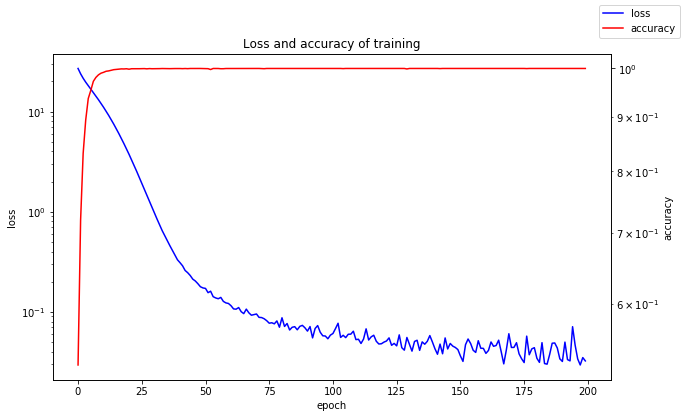

In [12]:
def progress_plot(loss, accuracy, title):
    fig, ax1 = plt.subplots(figsize=(10,6))
    plt.title(title)
    loss, = ax1.semilogy(loss, 'b-')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax2 = ax1.twinx()
    acc, = ax2.semilogy(accuracy, 'r-')
    ax2.set_ylabel('accuracy')
    fig.legend(labels=('loss', 'accuracy'), handles=(loss, acc), loc='upper right')
    plt.show()    
progress_plot(validation_loss_history, validation_accuracy_history, 'Loss and accuracy of validation')
progress_plot(train_loss_history, train_accuracy_history, 'Loss and accuracy of training')

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy, top_k = evaluate(X_processed_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))
    

Test Accuracy = 0.972
Test Loss = 0.149


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

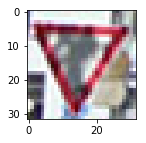

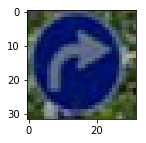

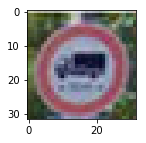

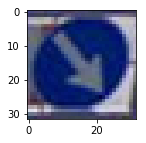

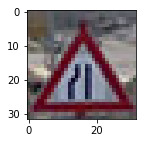

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import path, listdir
import matplotlib.image as mpimg
def is_image(file_name):
    return file_name.endswith('.jpg')
image_folder = "google/"
X_google_unprocessed = []
for file_name in listdir(image_folder):
    if is_image(file_name):   
        image = mpimg.imread(path.join(image_folder, file_name))
        plt.figure(figsize=(2,2))
        plt.imshow(image)
        X_google_unprocessed.append(image)

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
y_google = np.array([13, 33, 16, 38, 24])
X_google = preprocess(X_google_unprocessed)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for image, label in zip(X_google, y_google):
        test_loss, test_accuracy, top_k = evaluate([image], [label])
        print("For sign \"", sign_names['SignName'][label],"\"")
        print("Accuracy = {:.3f}%".format(test_accuracy * 100))
    

For sign " Yield "
Accuracy = 100.000%
For sign " Turn right ahead "
Accuracy = 100.000%
For sign " Vehicles over 3.5 metric tons prohibited "
Accuracy = 100.000%
For sign " Keep right "
Accuracy = 100.000%
For sign " Road narrows on the right "
Accuracy = 100.000%


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_loss, test_accuracy, top_k = evaluate(X_google, y_google)
    print("Accuracy = {:.3f}%".format(test_accuracy * 100))

Accuracy = 100.000%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
from IPython.display import HTML, display
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    loss, accuracy, top_k = evaluate(X_google, y_google, find_top_k = True)
    top_holder = []
    for values, indices, label in zip(top_k.values, top_k.indices, y_google):
        sign = sign_names['SignName'][label]
        for value, indice in zip(values, indices):
            top_holder.append({
                'sign': sign,
                'candidate': sign_names['SignName'][indice],
                'probability': value})
    pd.options.display.float_format = '{0:.5f}'.format
    display(pd.DataFrame(top_holder)[['sign', 'candidate', 'probability']])

,sign,candidate,probability
0,Yield,Yield,0.92673
1,Yield,Keep left,0.07326
2,Yield,Turn right ahead,0.00000
3,Turn right ahead,Turn right ahead,0.80266
4,Turn right ahead,Roundabout mandatory,0.11448
5,Turn right ahead,Keep left,0.08137
6,Vehicles over 3.5 metric tons prohibited,Vehicles over 3.5 metric tons prohibited,0.99998
7,Vehicles over 3.5 metric tons prohibited,End of all speed and passing limits,0.00002
8,Vehicles over 3.5 metric tons prohibited,No entry,0.00000
9,Keep right,Keep right,1.00000


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")